# Preprocessing

In [2]:
#Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from scipy.stats import skew
%matplotlib inline
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [3]:
#Open dataset
stars = pd.read_csv('stars.csv')
stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [4]:
#Display type and Nulls count
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
#Display overall dataset stats
stars.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [6]:
stars['Star type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

In [7]:
#Shuffle Dataset and reset indexes in ascending order
stars = shuffle(stars)
reset = pd.Series([x for x in range(240)])
stars = stars.set_index([reset])
stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,7740,0.00049,0.01234,14.02,2,White,A
1,18000,200000.00000,1045.00000,-8.30,5,Blue,O
2,12749,332520.00000,76.00000,-7.02,4,Blue,O
3,10980,0.00074,0.00870,11.19,2,Blue White,B
4,3180,0.00100,0.35000,11.76,1,Red,M
...,...,...,...,...,...,...,...
235,33750,220000.00000,26.00000,-6.10,4,Blue,B
236,34190,198200.00000,6.39000,-4.57,3,Blue,O
237,3752,209000.00000,955.00000,-11.24,5,Red,M
238,13420,0.00059,0.00981,13.67,2,Blue White,B


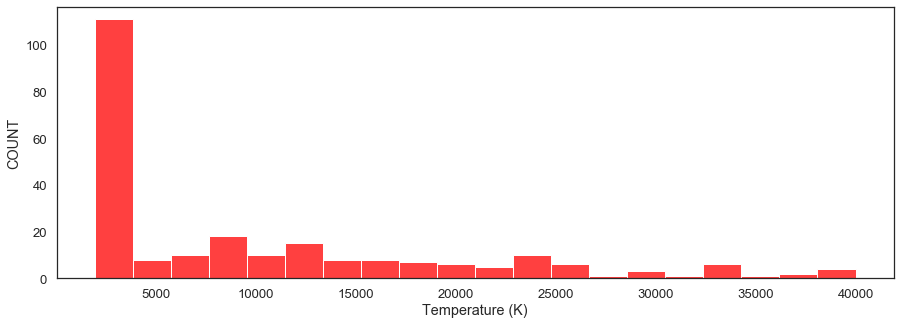

In [8]:
#Look at the distribution of features
#Distribution of Temperature (K) attribute
sns.set_style(style='white')
fig_dims = (15,5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.histplot(data=stars, x="Temperature (K)", bins=20,color="red")
ax.set(xlabel='Temperature (K)', ylabel='COUNT');
ax.figure.savefig("temp_hist.png")

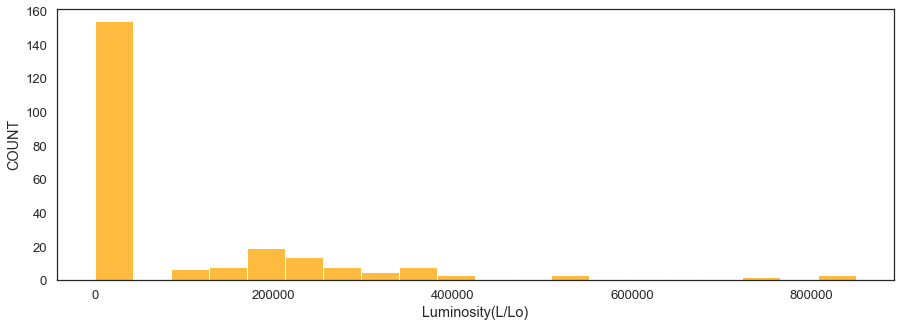

In [9]:
#Distribution of Luminosity(L/Lo) attribute
sns.set_style(style='white')
fig_dims = (15,5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.histplot(data=stars, x="Luminosity(L/Lo)", bins=20,color="orange")
ax.set(xlabel='Luminosity(L/Lo)', ylabel='COUNT');
ax.figure.savefig("lum_hist.png")

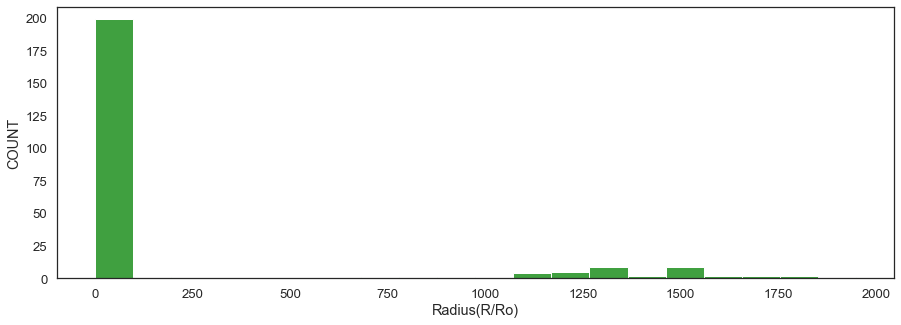

In [10]:
#Distribution of Radius(R/Ro) attribute
sns.set_style(style='white')
fig_dims = (15,5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.histplot(data=stars, x="Radius(R/Ro)", bins=20,color="green")
ax.set(xlabel='Radius(R/Ro)', ylabel='COUNT');
ax.figure.savefig("radius_hist.png")

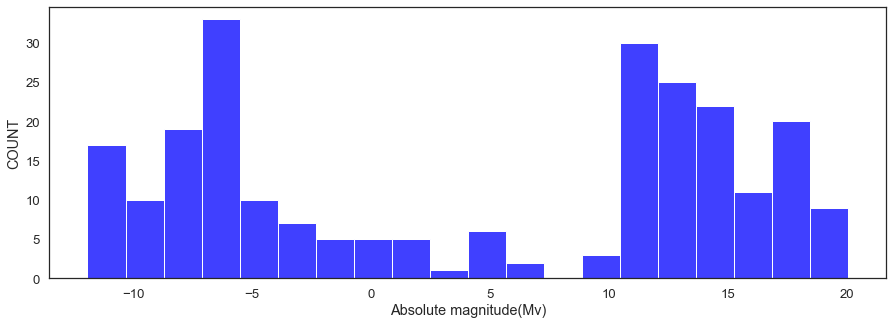

In [11]:
#Distribution of Absolute magnitude(Mv) attribute
sns.set_style(style='white')
fig_dims = (15,5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.histplot(data=stars, x="Absolute magnitude(Mv)", bins=20,color="blue")
ax.set(xlabel='Absolute magnitude(Mv)', ylabel='COUNT');
ax.figure.savefig("mag_hist.png")

## Normalization

In [12]:
#Make a copy for the 4 core numeric attributes
numeric = stars[['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)']]
numeric

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,7740,0.00049,0.01234,14.02
1,18000,200000.00000,1045.00000,-8.30
2,12749,332520.00000,76.00000,-7.02
3,10980,0.00074,0.00870,11.19
4,3180,0.00100,0.35000,11.76
...,...,...,...,...
235,33750,220000.00000,26.00000,-6.10
236,34190,198200.00000,6.39000,-4.57
237,3752,209000.00000,955.00000,-11.24
238,13420,0.00059,0.00981,13.67


In [13]:
#Normalize
norm_stars = (numeric - numeric.min())/(numeric.max() - numeric.min())
norm_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,0.152413,4.826823e-10,2.022077e-06,0.811132
1,0.421981,2.354548e-01,5.363080e-01,0.113196
2,0.284018,3.914671e-01,3.900022e-02,0.153221
3,0.237540,7.770008e-10,1.539653e-07,0.722639
4,0.032606,1.083092e-09,1.753151e-04,0.740463
...,...,...,...,...
235,0.835790,2.590003e-01,1.333934e-02,0.181989
236,0.847350,2.333357e-01,3.275149e-03,0.229831
237,0.047634,2.460502e-01,4.901184e-01,0.021263
238,0.301647,6.004097e-10,7.236367e-07,0.800188


In [14]:
norm_stars.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,240.000000,2.400000e+02,240.000000,240.000000
mean,0.224862,1.261901e-01,0.121709,0.509768
std,0.250977,2.112409e-01,0.265413,0.329347
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.036921,9.238657e-10,0.000048,0.177846
50%,0.100812,8.290363e-08,0.000387,0.632677
75%,0.344618,2.331591e-01,0.021936,0.801048
max,1.000000,1.000000e+00,1.000000,1.000000


In [15]:
#Distributions extracted
temp = norm_stars['Temperature (K)']
lum = norm_stars['Luminosity(L/Lo)']
radius = norm_stars['Radius(R/Ro)']
mag = norm_stars['Absolute magnitude(Mv)']

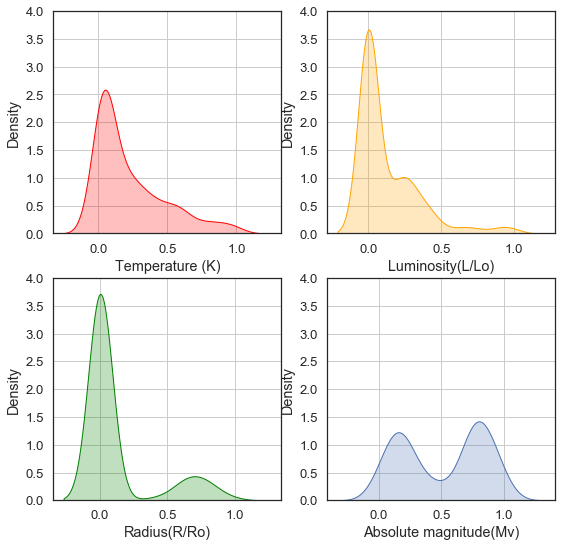

In [16]:
plt.subplot(2,2,1)
sns.kdeplot(temp, color='red',shade=True).set(ylim=(0, 4),)
plt.savefig("temp_kde.png")
plt.grid()

plt.subplot(2,2,2)
sns.kdeplot(lum, color='orange',shade=True).set(ylim=(0, 4))
plt.savefig("lum_kde.png")
plt.grid()

plt.subplot(2,2,3)
sns.kdeplot(radius, color='green',shade=True).set(ylim=(0, 4))
plt.savefig("radius_kde.png")
plt.grid()

plt.subplot(2,2,4)
sns.kdeplot(mag,shade=True).set(ylim=(0, 4))
plt.savefig("mag_kde.png")
plt.grid()

In [17]:
#print the skew of the distribution with two peaks and the other 3 right-skewed plots
print(skew(norm_stars['Temperature (K)']))
print(skew(norm_stars['Luminosity(L/Lo)']))
print(skew(norm_stars['Radius(R/Ro)']))
print(skew(norm_stars['Absolute magnitude(Mv)']))

1.31329415960302
2.055120943520842
1.9346117254577857
-0.1207786427322436


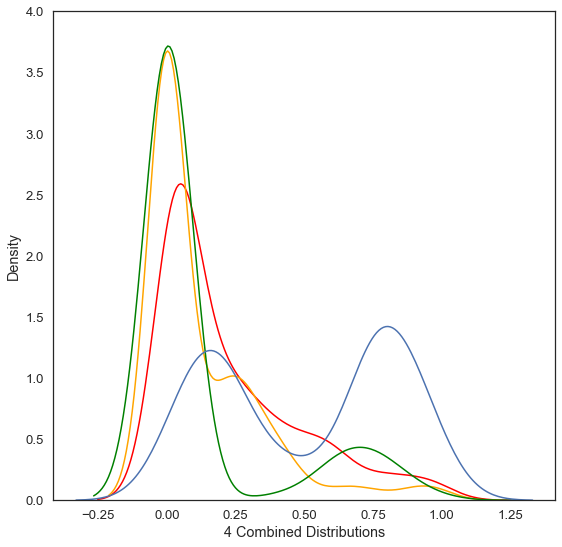

In [18]:
sns.set_style(style='white')
sns.kdeplot(temp,color='red').set(ylim=(0, 4))
sns.kdeplot(lum,color='orange').set(ylim=(0, 4))
sns.kdeplot(radius,color='green').set(ylim=(0, 4))
sns.kdeplot(mag).set(ylim=(0, 4))
plt.xlabel('4 Combined Distributions')
plt.savefig("before_standardized.png")

## Standardization

In [19]:
#Standardize
stand_stars = (norm_stars - norm_stars.mean())/norm_stars.std()
stand_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,-0.288666,-0.597375,-0.458557,0.915034
1,0.785407,0.517252,1.562087,-1.204119
2,0.235703,1.255803,-0.311623,-1.082590
3,0.050515,-0.597375,-0.458564,0.646342
4,-0.766032,-0.597375,-0.457904,0.700460
...,...,...,...,...
235,2.434203,0.628714,-0.408306,-0.995242
236,2.480264,0.507220,-0.446225,-0.849977
237,-0.706152,0.567410,1.388058,-1.483254
238,0.305947,-0.597375,-0.458562,0.881803


In [20]:
stand_stars.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02
mean,1.790235e-16,-2.077042e-16,-1.133353e-17,5.153285e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.959466e-01,-5.973751e-01,-4.585647e-01,-1.547816e+00
25%,-7.488373e-01,-5.973751e-01,-4.583823e-01,-1.007822e+00
50%,-4.942685e-01,-5.973747e-01,-4.571065e-01,3.731877e-01
75%,4.771602e-01,5.063841e-01,-3.759173e-01,8.844143e-01
max,3.088487e+00,4.136557e+00,3.309143e+00,1.488496e+00


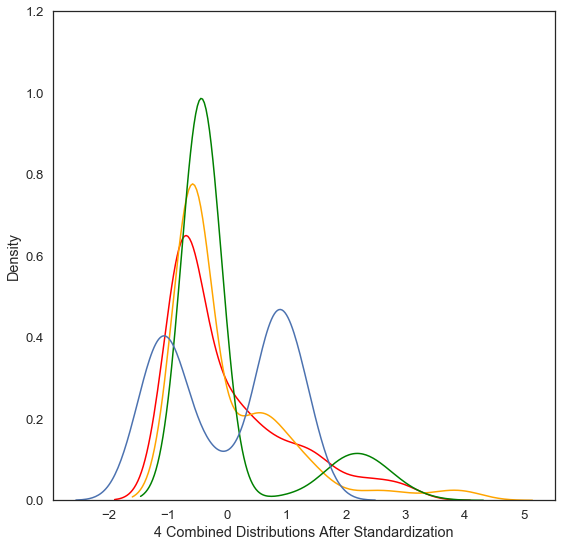

In [21]:
#After standardization
std_temp = stand_stars['Temperature (K)']
std_lum = stand_stars['Luminosity(L/Lo)']
std_radius = stand_stars['Radius(R/Ro)']
std_mag = stand_stars['Absolute magnitude(Mv)']

sns.set_style(style='white')
sns.kdeplot(std_temp,color='red').set(ylim=(0, 1.2))
sns.kdeplot(std_lum,color='orange').set(ylim=(0, 1.2))
sns.kdeplot(std_radius,color='green').set(ylim=(0, 1.2))
sns.kdeplot(std_mag).set(ylim=(0, 1.2))
plt.xlabel('4 Combined Distributions After Standardization')
plt.savefig("after_standardized.png")

## Number labelling 

In [22]:
#Know how many unique items exist
stars['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
white                   3
Yellowish White         3
Blue white              3
yellowish               2
Orange                  2
Whitish                 2
Blue-White              1
Orange-Red              1
White-Yellow            1
Blue white              1
Yellowish               1
Pale yellow orange      1
Blue                    1
Name: Star color, dtype: int64

In [23]:
#Extracted
stars['Star color'].value_counts().index.tolist()

['Red',
 'Blue',
 'Blue-white',
 'Blue White',
 'yellow-white',
 'White',
 'white',
 'Yellowish White',
 'Blue white',
 'yellowish',
 'Orange',
 'Whitish',
 'Blue-White',
 'Orange-Red',
 'White-Yellow',
 'Blue white ',
 'Yellowish',
 'Pale yellow orange',
 'Blue ']

In [24]:
#Replace star colors with numbers
def give_color_num(x):
  if x == 'Red': return 0
  elif x == 'Blue' or x == 'Blue ': return 1
  elif x in ['Blue-white','Blue White','Blue white','Blue-White','Blue white ']: return 2
  elif x in ['yellow-white','Yellowish White', 'yellowish', 'Yellowish', 'White-Yellow']: return 3
  elif x in ['White','white','Whitish']: return 4
  elif x in ['Pale yellow orange','Orange','Orange-Red']: return 5

In [25]:
#Converting colors
stars['Star color'] = pd.Series([give_color_num(value) for index, value in stars['Star color'].items()],dtype=object)

In [26]:
stars['Star color'].value_counts()

0    112
1     56
2     41
3     15
4     12
5      4
Name: Star color, dtype: int64

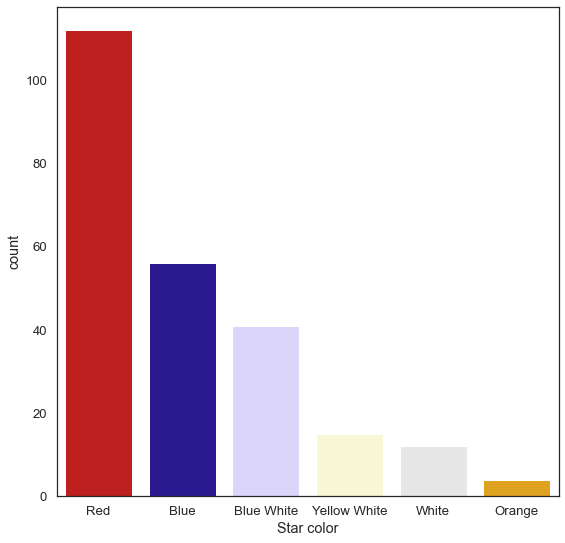

In [27]:
color_star = sns.countplot(data=stars, x='Star color', order = [0,1,2,3,4,5], palette = ['#d80505','#1c06a2','#d7d0ff', '#fffdd0','#e7e7e7','#ffae00'])
color_star.set_xticklabels(['Red','Blue','Blue White','Yellow White','White','Orange']);
plt.savefig("color_star.png")

In [28]:
#Check Star color
stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,7740,0.00049,0.01234,14.02,2,4,A
1,18000,200000.00000,1045.00000,-8.30,5,1,O
2,12749,332520.00000,76.00000,-7.02,4,1,O
3,10980,0.00074,0.00870,11.19,2,2,B
4,3180,0.00100,0.35000,11.76,1,0,M
...,...,...,...,...,...,...,...
235,33750,220000.00000,26.00000,-6.10,4,1,B
236,34190,198200.00000,6.39000,-4.57,3,1,O
237,3752,209000.00000,955.00000,-11.24,5,0,M
238,13420,0.00059,0.00981,13.67,2,2,B


In [29]:
#Check to Spectral Class
stars['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

In [30]:
#Function that assigns spectral classes to numbers
def give_spectral_num(x):
  if x == 'M': return 0
  elif x == 'B': return 1
  elif x == 'O': return 2
  elif x == 'A': return 3
  elif x == 'F': return 4
  elif x == 'K': return 5
  elif x == 'G': return 6

In [31]:
#Conversion
stars['Spectral Class'] = pd.Series([give_spectral_num(value) for index, value in stars['Spectral Class'].items()],dtype=object)

In [32]:
stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,7740,0.00049,0.01234,14.02,2,4,3
1,18000,200000.00000,1045.00000,-8.30,5,1,2
2,12749,332520.00000,76.00000,-7.02,4,1,2
3,10980,0.00074,0.00870,11.19,2,2,1
4,3180,0.00100,0.35000,11.76,1,0,0
...,...,...,...,...,...,...,...
235,33750,220000.00000,26.00000,-6.10,4,1,1
236,34190,198200.00000,6.39000,-4.57,3,1,2
237,3752,209000.00000,955.00000,-11.24,5,0,0
238,13420,0.00059,0.00981,13.67,2,2,1


In [33]:
#Create Dataframe
star_final = pd.DataFrame()

In [34]:
#Create the new Dataset
star_final['temperature'] = stand_stars['Temperature (K)']
star_final['luminosity'] = stand_stars['Luminosity(L/Lo)']
star_final['radius'] = stand_stars['Radius(R/Ro)']
star_final['abs_mag'] = stand_stars['Absolute magnitude(Mv)']
star_final['color'] = stars['Star color']
star_final['spectral'] = stars['Spectral Class']
star_final['type'] = stars['Star type']
star_final

,temperature,luminosity,radius,abs_mag,color,spectral,type
0,-0.288666,-0.597375,-0.458557,0.915034,4,3,2
1,0.785407,0.517252,1.562087,-1.204119,1,2,5
2,0.235703,1.255803,-0.311623,-1.082590,1,2,4
3,0.050515,-0.597375,-0.458564,0.646342,2,1,2
4,-0.766032,-0.597375,-0.457904,0.700460,0,0,1
...,...,...,...,...,...,...,...
235,2.434203,0.628714,-0.408306,-0.995242,1,1,4
236,2.480264,0.507220,-0.446225,-0.849977,1,2,3
237,-0.706152,0.567410,1.388058,-1.483254,0,0,5
238,0.305947,-0.597375,-0.458562,0.881803,2,1,2


In [35]:
#save new dataset
star_final.to_csv('star_final.csv', index = False)          

In [36]:
X = star_final[['temperature','luminosity','radius', 'abs_mag', 'color','spectral']]
X

,temperature,luminosity,radius,abs_mag,color,spectral
0,-0.288666,-0.597375,-0.458557,0.915034,4,3
1,0.785407,0.517252,1.562087,-1.204119,1,2
2,0.235703,1.255803,-0.311623,-1.082590,1,2
3,0.050515,-0.597375,-0.458564,0.646342,2,1
4,-0.766032,-0.597375,-0.457904,0.700460,0,0
...,...,...,...,...,...,...
235,2.434203,0.628714,-0.408306,-0.995242,1,1
236,2.480264,0.507220,-0.446225,-0.849977,1,2
237,-0.706152,0.567410,1.388058,-1.483254,0,0
238,0.305947,-0.597375,-0.458562,0.881803,2,1


# Clustering Algorithms

## KMeans clustering algorithm

In [37]:
arr_X = np.array(X)
arr_X.shape

(240, 6)

In [38]:
from sklearn.cluster import KMeans

In [43]:
#Start the KMeans Clustering Algorithm
kmeans = KMeans(n_clusters = 6)

kmeans.fit(arr_X)

centers = kmeans.cluster_centers_

cluster = kmeans.predict(arr_X)

In [46]:
#6 cluster , 2 points
centers.shape

(6, 2)

In [47]:
centers = pca_2.transform(kmeans.cluster_centers_)
centers

array([[ 2.35917915,  2.60781198],
       [-2.04433816, -0.68467393],
       [ 2.61706327, -1.84125652],
       [-1.12805188,  2.09639996],
       [ 1.22286899,  0.98580263],
       [ 0.2764548 , -0.58285539]])

#### Elbow technique

In [48]:
#Elbow method to determine the most suitable number of clusters
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(arr_X)
  sse.append(km.inertia_)

In [49]:
#Sum of squared error for every iteration
sse

[1832.291666666667,
 1151.216492089657,
 819.1703509139207,
 611.9547679003996,
 481.07366342512285,
 393.1189575451267,
 352.27294779691806,
 299.70516181078824,
 264.26554237947266]

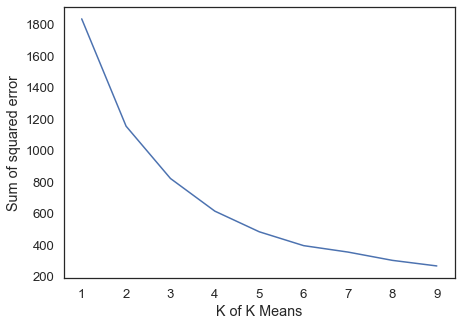

In [79]:
#Elbow plot problem
ax, fig = plt.subplots(figsize = (7,5))
plt.xlabel('K of K Means')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.savefig("sse.png")

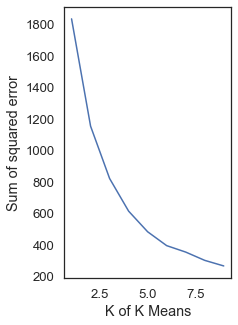

In [80]:
#Elbow plot problem Now at 6 clusters
ax, fig = plt.subplots(figsize = (3,5))
plt.xlabel('K of K Means')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.savefig("sse_squeezed.png")

#### Dimensionality Reduction and Kmeans plot

[[ 2.61706327 -1.84125652]
 [-1.96956422 -0.50489368]
 [ 2.43651243  2.62929018]
 [ 0.2764548  -0.58285539]
 [-0.95694911  2.51346839]
 [ 1.22286899  0.98580263]]


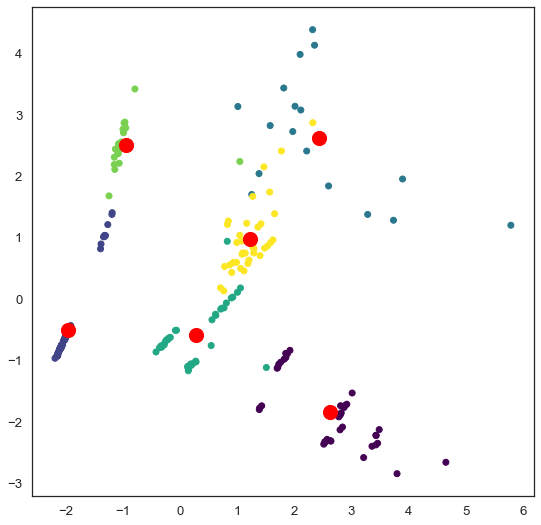

In [81]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)

plot_cols = pca_2.fit_transform(arr_X)
centers = pca_2.transform(kmeans.cluster_centers_)

plt.scatter(x = plot_cols[:,0], y = plot_cols[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], s=200, c='red')
plt.savefig("kmeans_scatter_one.png")
print(centers)

#### Different iterations for K = 6 

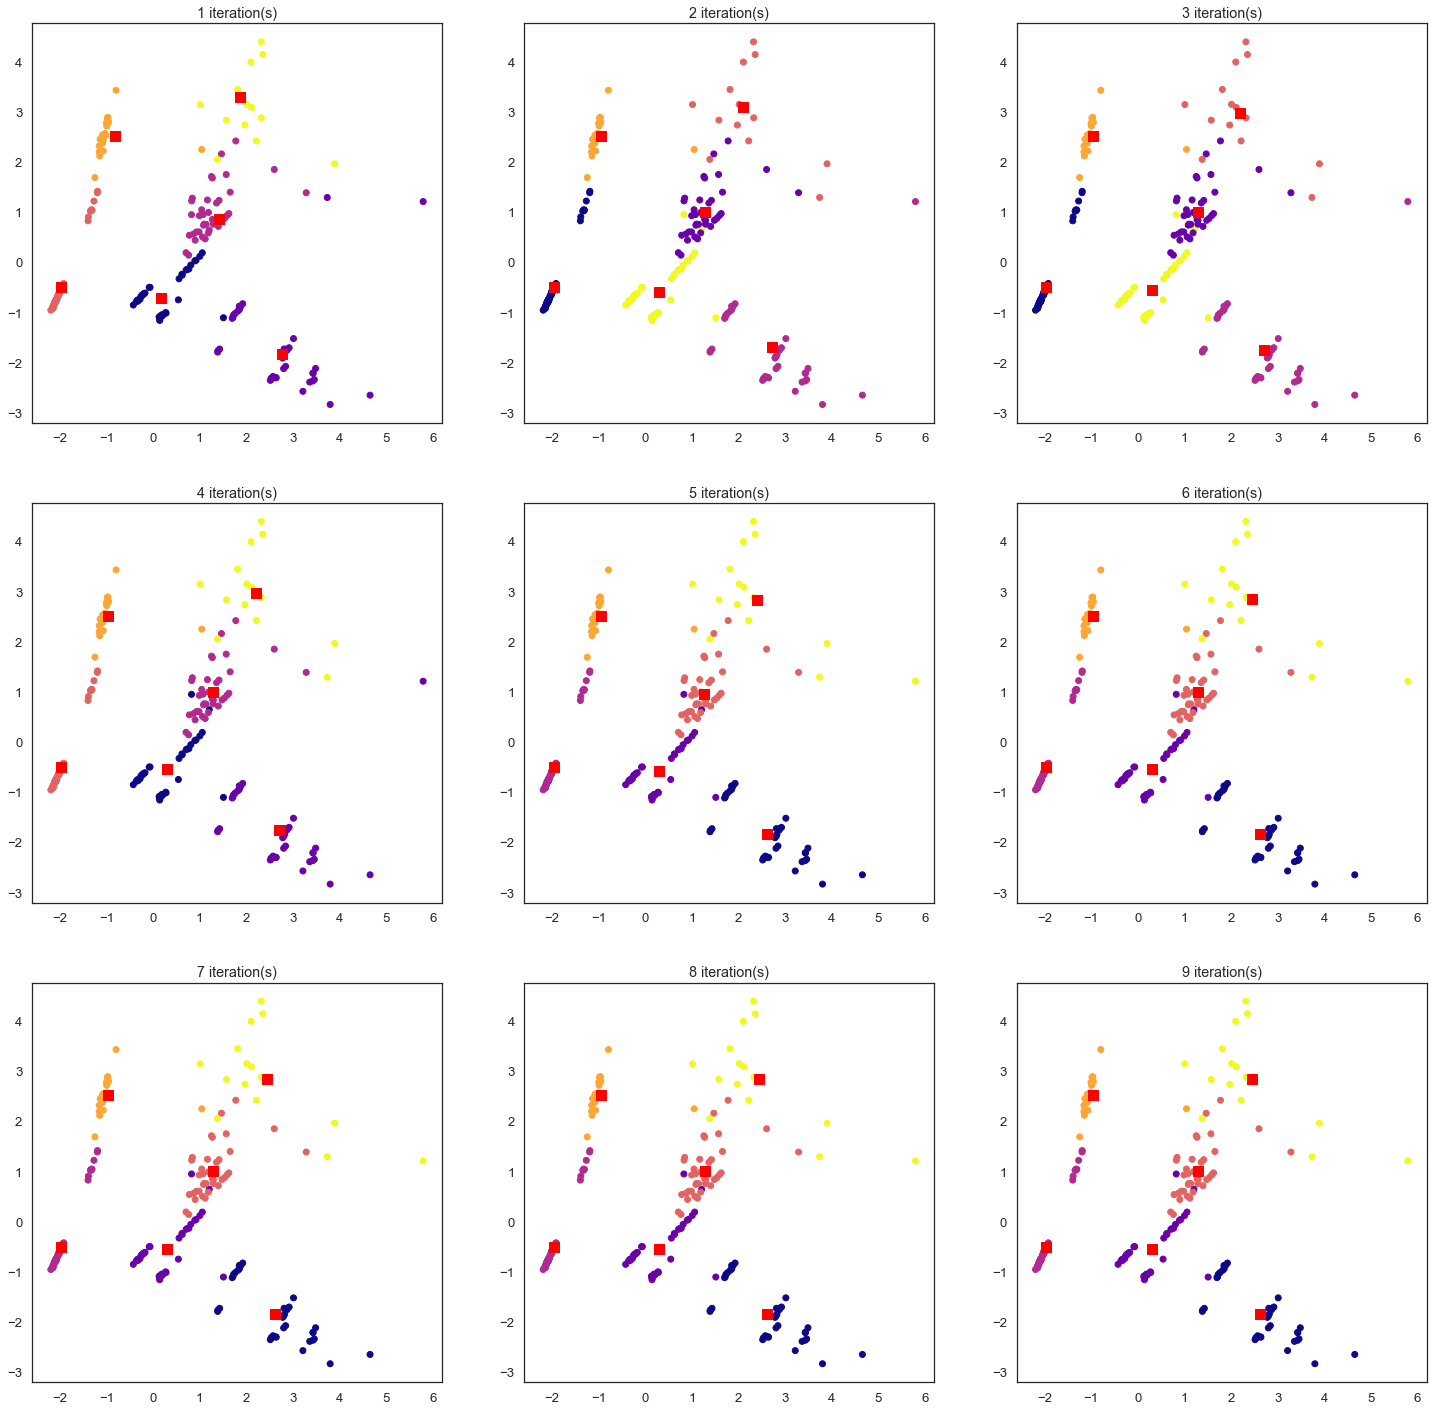

In [82]:
#Done for different iterations
fig , ax = plt.subplots(nrows=3, ncols=3, figsize = (25,25))

r = c = 0

pca_loop = PCA(2)

for i in range(1,10):
  ax[r,c].title.set_text(str(i)+" iteration(s)")
  
  kmeans = KMeans(n_clusters = 6, random_state = 1, max_iter = i)
  kmeans.fit(arr_X)
  
  
  plot_cols = pca_loop.fit_transform(arr_X)
  centers = pca_loop.transform(kmeans.cluster_centers_)

  ax[r,c].scatter(plot_cols[:,0],plot_cols[:,1], c=kmeans.labels_, cmap='plasma')
  ax[r,c].scatter(centers[:,0], centers[:,1], s=100, c='red', marker = 's')

  
  c+=1
  if c == 3:
    c = 0
    r+=1
    
plt.savefig("kmeans_iterations_k6.png")

#### Clustering for the range 3-6

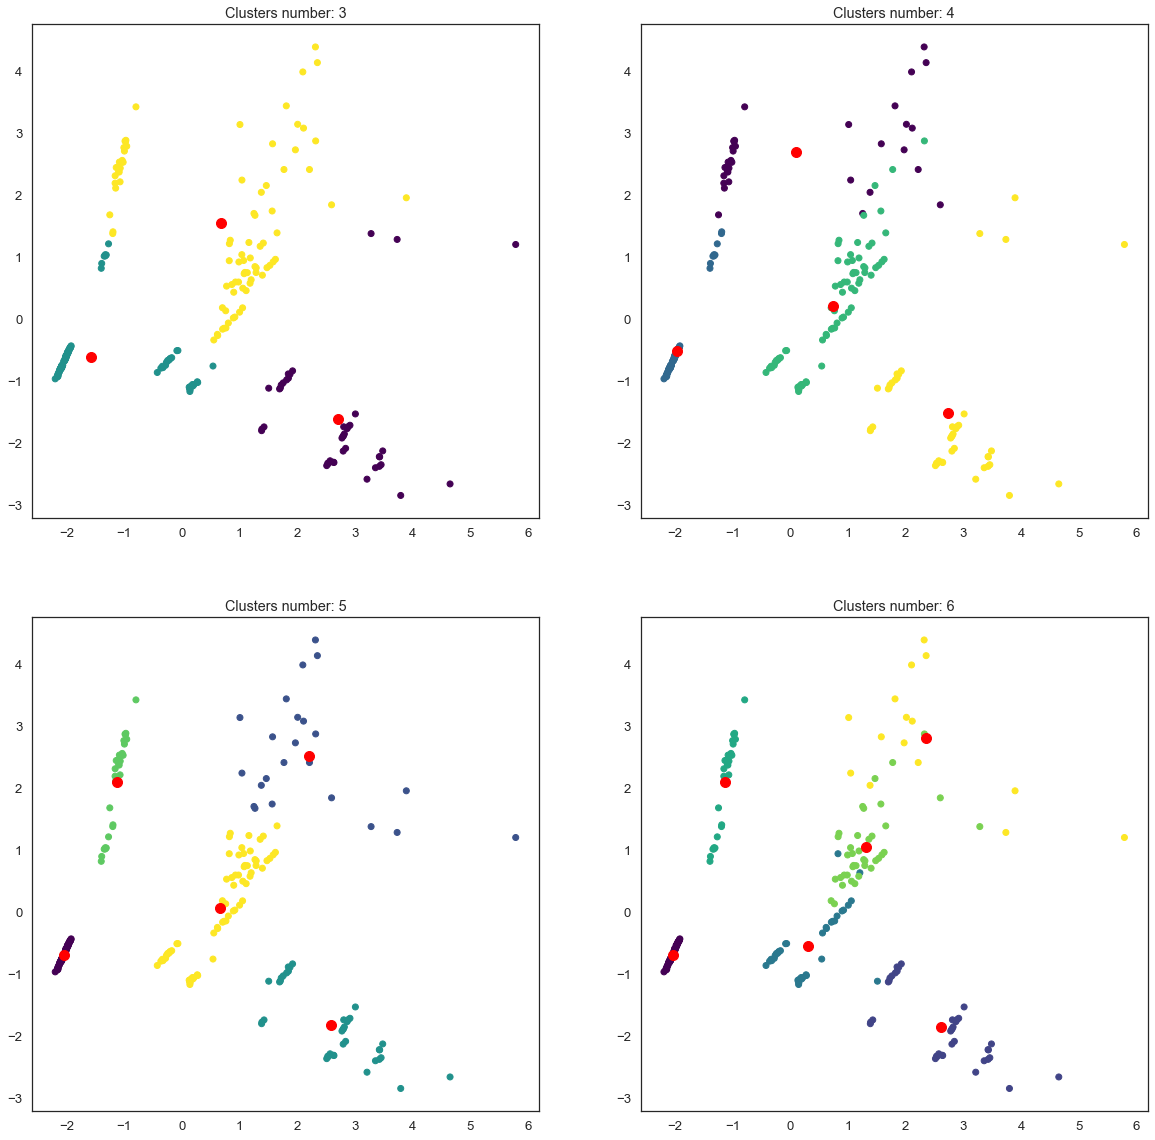

In [83]:
#Done for different number of clusters K
fig , ax = plt.subplots(nrows=2, ncols=2, figsize = (20,20))

r = c = 0

pca_loop = PCA(2)

for k in range(3,7):
  ax[r,c].title.set_text("Clusters number: " + str(k))
  
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(arr_X)
  
  
  plot_cols = pca_loop.fit_transform(arr_X)
  centers = pca_loop.transform(kmeans.cluster_centers_)

  ax[r,c].scatter(plot_cols[:,0],plot_cols[:,1], c=kmeans.labels_, cmap='viridis')
  ax[r,c].scatter(centers[:,0], centers[:,1], s=100, c='red')

  
  c+=1
  if c == 2:
    c = 0
    r+=1
    
plt.savefig("kmeans_clusters_3-6.png")

## Hierarchical clustering algorithm

##### Dendrogram

In [54]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [71]:
pca_dendro = PCA(n_components = 2)
pca_fit = pca_dendro.fit_transform(X)
pca_fit = pd.DataFrame(pca_fit)
pca_fit.columns = ['P1','P2']

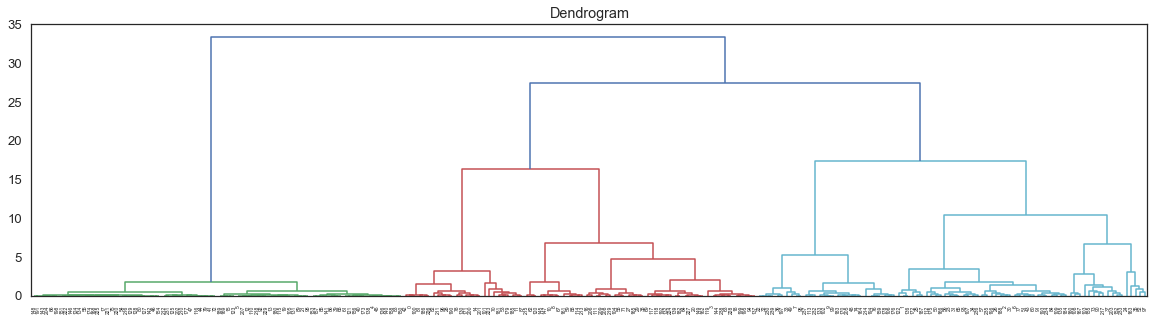

In [84]:
plt.figure(figsize = (20,5))
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(pca_fit,  method='ward'))
plt.savefig("dendrogram.png")
plt.show()

##### Agglomerative Clustering

In [76]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage="average")

In [77]:
y_hc = hc.fit_predict(arr_X)

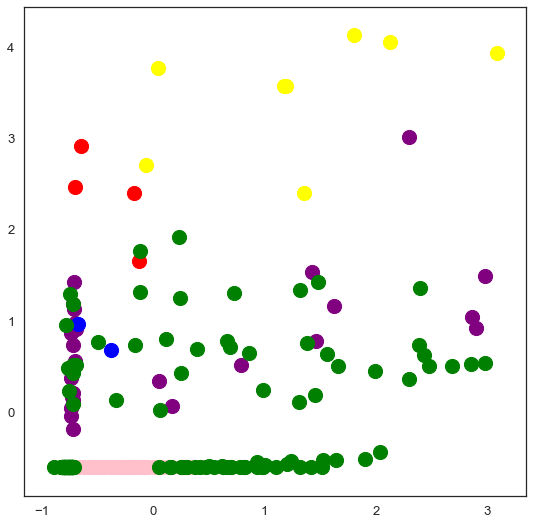

In [85]:
plt.scatter(arr_X[y_hc == 0,0],arr_X[y_hc == 0,1], s = 200, c = 'red', label = 'Clustering 1')
plt.scatter(arr_X[y_hc == 1,0],arr_X[y_hc == 1,1], s = 200, c = 'pink', label = 'Clustering 2')
plt.scatter(arr_X[y_hc == 2,0],arr_X[y_hc == 2,1], s = 200, c = 'purple', label = 'Clustering 3')
plt.scatter(arr_X[y_hc == 3,0],arr_X[y_hc == 3,1], s = 200, c = 'blue', label = 'Clustering 4')
plt.scatter(arr_X[y_hc == 4,0],arr_X[y_hc == 4,1], s = 200, c = 'yellow', label = 'Clustering 5')
plt.scatter(arr_X[y_hc == 5,0],arr_X[y_hc == 5,1], s = 200, c = 'green', label = 'Clustering 5')
plt.savefig("agglomerative.png")
plt.show()

# Tryouts 

In [69]:
from matplotlib.animation import FuncAnimation

In [70]:
%matplotlib tk
fig = plt.figure()

my_plt = plt.plot([])
my_plt = my_plt[0]

plt.xlim(-2,6)
plt.ylim(-3,4)

k_idx = 0

def animate():
  
  kmeans = KMeans(n_clusters = k_idx)
  kmeans.fit(arr_X)
  
  plot_cols = pca_loop.fit_transform(arr_X)
  centers = pca_loop.transform(kmeans.cluster_centers_)
  
  plt.scatter(plot_cols[:,0],plot_cols[:,1], cmap = 'viridis')
  plt.scatter(centers[:,0], centers[:,1], c = 'black')
  
  k_idx += 1
  
  
anim = FuncAnimation(fig, animate, frames = 100, interval = 500)

In [731]:
def update(i):
  k_idx +=1
  kmeans_ani(k_idx)
  return

In [724]:
k_idx = 0

%matplotlib tk
anim = FuncAnimation(fig, update, repeat=True, frames=np.arange(0,4), interval=500)

plt.show()
anim

In [569]:
print('omar')

omar


In [561]:
arr_X

array([[0.9867167199250075, 0.24974127911247238, -0.3174242520181025,
        -0.956314647259263, 1, 2],
       [0.720815653952959, 1.3136526182567074, -0.40057134819868656,
        -0.9942922908341693, 1, 2],
       [-0.16252024946127203, -0.5971633563984562, -0.45377195418046357,
        -0.404689374333748, 2, 3],
       ...,
       [3.088486681153677, 3.93358305582457, -0.4315098025914621,
        -1.0075844660853865, 1, 2],
       [1.9955704887331307, 0.4503741141527681, -0.4469403567198589,
        -0.7968085442446562, 2, 1],
       [0.25077794284488875, 0.42808157692606863, -0.38896942780139576,
        -1.0180283180684857, 1, 2]], dtype=object)

In [544]:
pred_km

array([2, 2, 0, 0, 2, 3, 1, 3, 5, 0, 2, 1, 5, 3, 4, 1, 4, 0, 0, 1, 1, 1,
       1, 1, 4, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 2, 3, 1, 5, 3, 1, 1, 3,
       4, 2, 1, 1, 3, 3, 0, 2, 2, 4, 4, 3, 0, 1, 1, 3, 5, 1, 0, 2, 1, 4,
       3, 0, 3, 3, 5, 1, 1, 1, 1, 4, 5, 2, 5, 4, 0, 0, 3, 0, 5, 0, 1, 2,
       4, 1, 2, 1, 1, 5, 0, 4, 0, 2, 3, 1, 2, 4, 3, 0, 1, 1, 1, 2, 5, 1,
       2, 5, 1, 1, 1, 1, 0, 1, 3, 5, 3, 4, 1, 3, 4, 2, 1, 3, 3, 1, 3, 1,
       1, 2, 3, 2, 5, 3, 1, 4, 1, 2, 3, 1, 4, 0, 4, 1, 1, 4, 1, 1, 0, 5,
       1, 1, 4, 3, 2, 2, 0, 1, 4, 1, 2, 1, 0, 1, 3, 1, 5, 1, 3, 3, 1, 3,
       4, 1, 1, 0, 3, 1, 4, 0, 0, 4, 2, 1, 4, 1, 3, 1, 1, 4, 4, 1, 1, 1,
       4, 2, 3, 5, 1, 3, 1, 3, 1, 1, 0, 1, 4, 4, 1, 0, 1, 2, 0, 1, 0, 2,
       1, 3, 0, 4, 0, 2, 0, 5, 2, 0, 2, 2, 0, 1, 5, 1, 2, 2, 2, 2])

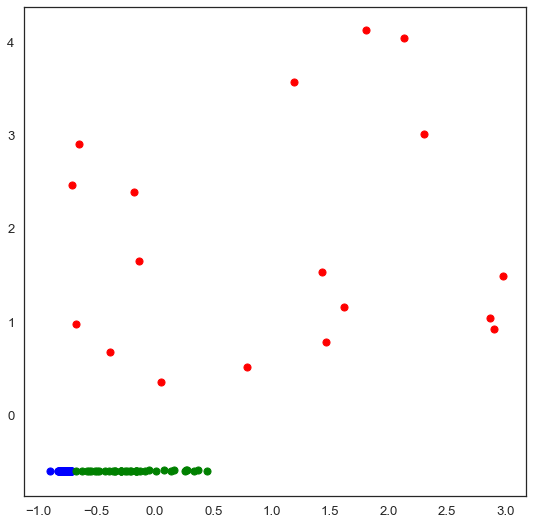

In [538]:
plt.scatter(arr_X[pred_km == 0,0], arr_X[pred_km == 0,1],s=50, color='red')
plt.scatter(arr_X[pred_km == 1,0], arr_X[pred_km == 1,1],s=50, color='Blue')
plt.scatter(arr_X[pred_km == 2,0], arr_X[pred_km == 2,1],s=50, color='Green')
plt.show()

In [343]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=3, 
                           centers=5, cluster_std=1.8,random_state=101)

data[0]

array([[-6.49405798e+00, -4.21167722e-01, -1.90682196e+00],
       [ 2.28248292e+00,  2.22242637e+00, -9.43584872e+00],
       [ 2.53116927e-02,  1.21883068e+00, -6.70991690e+00],
       [-8.08162016e+00,  5.77427016e+00,  9.39149027e+00],
       [-3.68760922e+00,  8.11835952e+00,  5.58128528e+00],
       [-4.52481363e+00,  1.00814618e+00, -4.34858469e+00],
       [-6.50803187e+00,  6.84602229e+00,  7.45122326e+00],
       [-7.43968641e+00,  1.67547625e+00, -2.34506780e+00],
       [-1.32026231e+00,  1.01678785e+01,  4.57352271e+00],
       [-7.47791194e+00,  1.84840145e+00,  5.16981053e+00],
       [-7.09845328e+00,  7.64215097e+00,  7.77450973e+00],
       [-3.11508207e+00,  1.79675003e-01, -1.17412368e+00],
       [-6.42814092e-01,  8.81561690e+00,  2.12733073e+00],
       [-7.12026025e+00,  5.41509165e+00, -1.18955742e+00],
       [-5.21248369e+00,  3.61635208e+00,  8.52804416e+00],
       [ 4.84709939e-01,  6.97920653e-01, -7.15947711e+00],
       [-5.09677257e+00,  1.07645837e+00